In [32]:
import subprocess
import re
import time
import glob
from IPython.display import display, Image, clear_output

command1 = "python3 vrp_GA.py 400 100 < input.txt"
command2 = "python3 vrp_BO.py 400 100 < input.txt"

with open('input.txt', 'r') as file:
    data = file.read()

In [33]:
data

'params:\n  capacity 400\nnodes:\n  node01\t\t6.911\t\t1.741\t\t1.844\n  node02\t\t31.576\t\t1.350\t\t6.640\n  node03\t\t37.608\t\t-5.373\t\t-5.584\n  node04\t\t9.901\t\t-8.511\t\t-1.358\n  node05\t\t9.737\t\t-1.491\t\t-3.982\n  node06\t\t40.461\t\t1.098\t\t5.121\n  node07\t\t30.858\t\t6.059\t\t7.438\n  node08\t\t29.316\t\t8.649\t\t-5.974\n  node09\t\t13.422\t\t-3.339\t\t6.666\n  node10\t\t23.115\t\t-3.510\t\t-3.836\n  node11\t\t1.843\t\t1.609\t\t5.028\n  node12\t\t12.972\t\t5.101\t\t-0.239\n  node13\t\t37.984\t\t-7.577\t\t2.191\n  node14\t\t31.043\t\t-7.064\t\t0.003\n  node15\t\t12.350\t\t-5.279\t\t-7.268\n  node16\t\t28.718\t\t2.270\t\t2.059\n  node17\t\t10.432\t\t9.884\t\t6.926\n  node18\t\t34.548\t\t-5.035\t\t-4.805\n  node19\t\t7.599\t\t-8.561\t\t3.891\n  node20\t\t16.721\t\t8.208\t\t-4.918\n  node21\t\t27.285\t\t9.507\t\t-4.990\n  node22\t\t39.618\t\t-3.370\t\t-2.041\n  node23\t\t37.173\t\t-8.944\t\t-2.538\n  node24\t\t7.708\t\t-6.808\t\t1.237\n  node25\t\t34.294\t\t-5.991\t\t-5.

In [34]:
start_time = time.time()

process = subprocess.Popen(command1, stdout=subprocess.PIPE, shell=True, text=True)
output, _ = process.communicate()

end_time = time.time()
time1 = end_time - start_time

split1 = output.split('\n')
cost1 = split1[-1]
route1 = split1[:-1]

start_time = time.time()

process = subprocess.Popen(command1, stdout=subprocess.PIPE, shell=True, text=True)
output, _ = process.communicate()

end_time = time.time()
time2 = end_time - start_time

split2 = output.split('\n')
cost2 = split2[-1]
route2 = split2[:-1]

In [35]:
print(f"Genetic Algorithm - Cost: {cost1}, Time: {time1}")
print(f"Bonobo Optimization - Cost: {cost2}, Time: {time2}")

Genetic Algorithm - Cost: 252.406685, Time: 32.99672603607178
Bonobo Optimization - Cost: 237.989717, Time: 30.809785842895508


In [36]:
coordinates = re.findall(r'node\d+\s+\S+\s+([-]?\d+\.\d+)\s+([-]?\d+\.\d+)', data)

coordinates_list = [(0.0, 0.0)]
coordinates_list+=[(float(x), float(y)) for x, y in coordinates]

In [37]:
print(coordinates_list)

[(0.0, 0.0), (1.741, 1.844), (1.35, 6.64), (-5.373, -5.584), (-8.511, -1.358), (-1.491, -3.982), (1.098, 5.121), (6.059, 7.438), (8.649, -5.974), (-3.339, 6.666), (-3.51, -3.836), (1.609, 5.028), (5.101, -0.239), (-7.577, 2.191), (-7.064, 0.003), (-5.279, -7.268), (2.27, 2.059), (9.884, 6.926), (-5.035, -4.805), (-8.561, 3.891), (8.208, -4.918), (9.507, -4.99), (-3.37, -2.041), (-8.944, -2.538), (-6.808, 1.237), (-5.991, -5.976), (-4.961, -1.976), (3.146, 6.165), (8.68, 5.738), (1.063, -3.976), (8.305, 1.582), (9.409, 4.649), (-2.679, 7.3), (-2.695, 4.295), (8.678, 7.235), (7.443, 1.712), (-3.593, 7.585), (4.137, -2.928), (1.006, -2.276), (-7.253, -7.395), (0.514, 2.063), (-7.557, 2.372), (6.155, 2.503), (0.429, -6.146), (7.392, 0.27), (-5.019, -0.684), (1.324, -0.229), (-0.334, 1.209), (-0.919, 5.371), (-1.653, -0.142), (1.134, 5.682)]


In [38]:
import cv2
import numpy as np

route1 = [int(node) for node in route1]
route2 = [int(node) for node in route2]

route_coordinates1 = [(int(coordinates_list[node][0]),int(coordinates_list[node][1])) for node in route1]
route_coordinates2 = [(int(coordinates_list[node][0]),int(coordinates_list[node][1])) for node in route2]

In [39]:
def display_image(img):
    _, encoded_img = cv2.imencode('.png', img)
    display(Image(data=encoded_img))

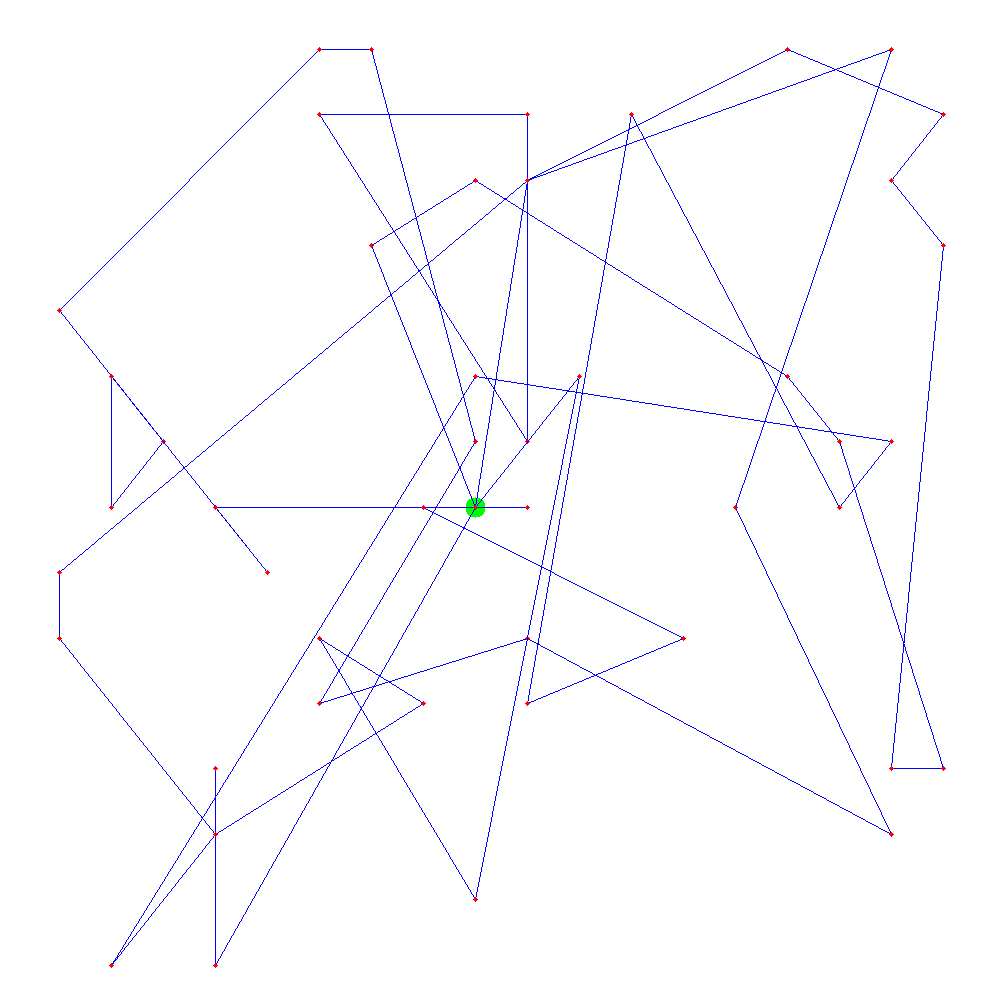

In [40]:
image_size = 1000
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

x_coords = [coord[0] for coord in coordinates_list]
y_coords = [coord[1] for coord in coordinates_list]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

def normalize(value, min_value, max_value, image_dim):
    return int((value - min_value) / (max_value - min_value) * (image_dim - 20) + 10)

depot_x = normalize(coordinates_list[0][0], x_min, x_max, image_size)
depot_y = normalize(coordinates_list[0][1], y_min, y_max, image_size)
cv2.circle(image, (depot_x, image_size - depot_y), 10, (0, 255, 0), -1)  # Green color for depot

for i in range(len(route_coordinates1) - 1):
    x1 = normalize(route_coordinates1[i][0], x_min, x_max, image_size)
    y1 = normalize(route_coordinates1[i][1], y_min, y_max, image_size)
    x2 = normalize(route_coordinates1[i + 1][0], x_min, x_max, image_size)
    y2 = normalize(route_coordinates1[i + 1][1], y_min, y_max, image_size)

    cv2.line(image, (x1, image_size - y1), (x2, image_size - y2), (255, 0, 0), 1)
    cv2.circle(image, (x1, image_size - y1), 2, (0, 0, 255), -1)

    clear_output(wait=True)
    display_image(image)
    time.sleep(0.2)  

x_last = normalize(route_coordinates1[-1][0], x_min, x_max, image_size)
y_last = normalize(route_coordinates1[-1][1], y_min, y_max, image_size)
cv2.circle(image, (x_last, image_size - y_last), 2, (0, 0, 255), -1)

clear_output(wait=True)
display_image(image)

In [ ]:
image_size = 1000
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

x_coords = [coord[0] for coord in coordinates_list]
y_coords = [coord[1] for coord in coordinates_list]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

def normalize(value, min_value, max_value, image_dim):
    return int((value - min_value) / (max_value - min_value) * (image_dim - 20) + 10)

depot_x = normalize(coordinates_list[0][0], x_min, x_max, image_size)
depot_y = normalize(coordinates_list[0][1], y_min, y_max, image_size)
cv2.circle(image, (depot_x, image_size - depot_y), 10, (0, 255, 0), -1)  # Green color for depot

for i in range(len(route_coordinates2) - 1):
    x1 = normalize(route_coordinates2[i][0], x_min, x_max, image_size)
    y1 = normalize(route_coordinates2[i][1], y_min, y_max, image_size)
    x2 = normalize(route_coordinates2[i + 1][0], x_min, x_max, image_size)
    y2 = normalize(route_coordinates2[i + 1][1], y_min, y_max, image_size)

    cv2.line(image, (x1, image_size - y1), (x2, image_size - y2), (255, 0, 0), 1)
    cv2.circle(image, (x1, image_size - y1), 2, (0, 0, 255), -1)

    clear_output(wait=True)
    display_image(image)
    time.sleep(0.2)  

x_last = normalize(route_coordinates2[-1][0], x_min, x_max, image_size)
y_last = normalize(route_coordinates2[-1][1], y_min, y_max, image_size)
cv2.circle(image, (x_last, image_size - y_last), 2, (0, 0, 255), -1)

clear_output(wait=True)
display_image(image)